In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('data/internship_train.csv')
df_test = pd.read_csv("data/internship_hidden_test.csv")

# Descriptive analysis

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  int64  
 1   1       10000 non-null  int64  
 2   2       10000 non-null  int64  
 3   3       10000 non-null  int64  
 4   4       10000 non-null  int64  
 5   5       10000 non-null  int64  
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  int64  
 9   9       10000 non-null  int64  
 10  10      10000 non-null  int64  
 11  11      10000 non-null  int64  
 12  12      10000 non-null  int64  
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

* Features of the test data are the same as features of the training data
* All features are either float64 or int64 type
* There are no missing values

In [5]:
df_train_stats = df_train.describe()
df_train_stats.loc['skew'] = df_train.skew().tolist()
df_train_stats.loc['kurt'] = df_train.kurt().tolist()

df_train_stats.T

,count,mean,std,min,25%,50%,75%,max,skew,kurt
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000,-0.006187,-1.198122
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000,-0.006009,-1.192255
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000,0.008612,-1.193689
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000,-0.002684,-1.198858
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000,-0.000764,-1.196359
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000,-0.001232,-1.199202
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874,0.003641,-1.659748
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987,0.008397,-1.197125
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000,0.003245,-2.000034
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000,-0.001524,-1.202984


* There are groups of features that are having approximately the same distribution
* Some Features have a big variance
* Negative kurtosis indicates that the data is less outlier-prone than the normal distribution
* Data is not skewed

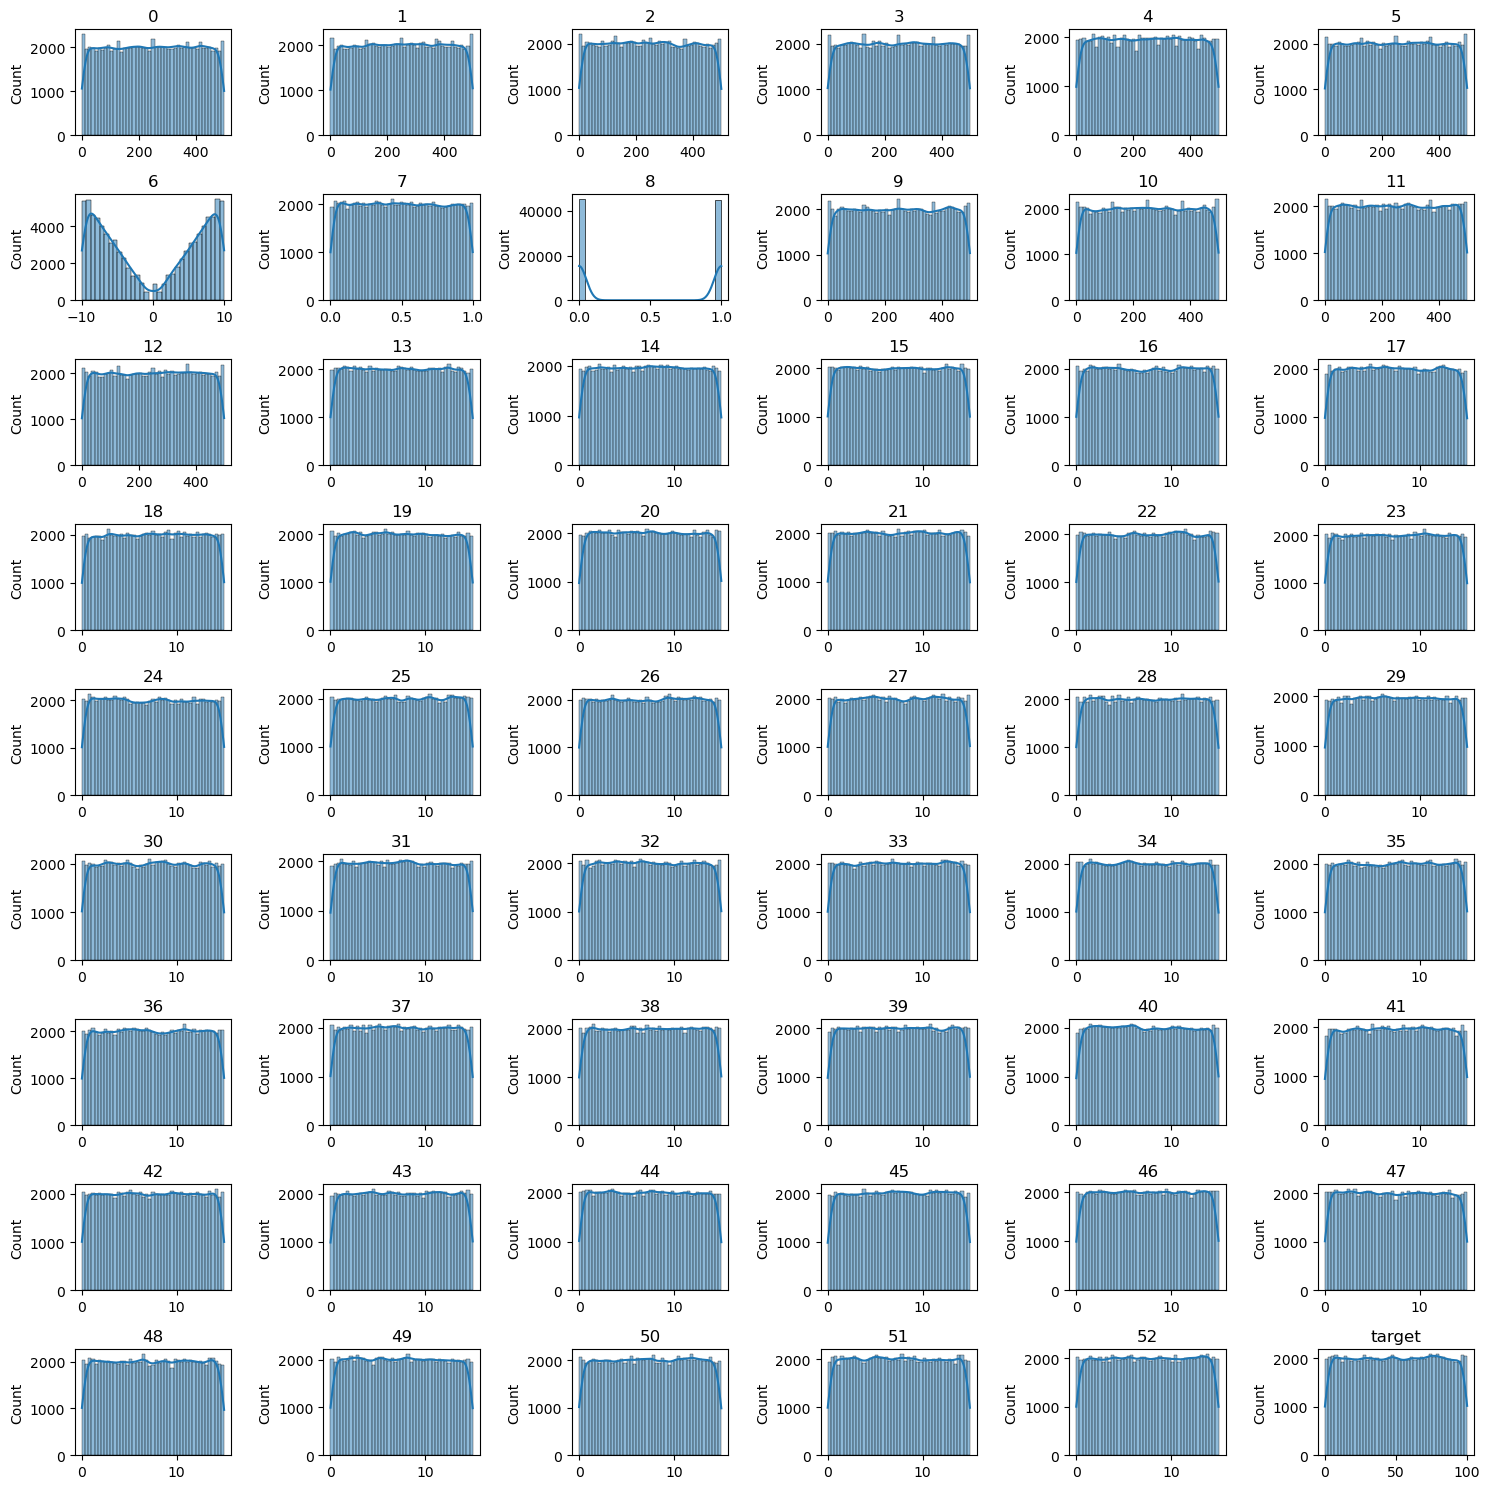

In [6]:
fig, ax = plt.subplots(9, 6, figsize=(15, 15))
ax = ax.flatten()

for i, var in enumerate(df_train):
    sns.histplot(data=df_train, x=var, kde=True, ax=ax[i])
    ax[i].set_title(f"{var}")
    ax[i].set(xlabel=None)

plt.tight_layout()
plt.show()

* The majority of the features is approximately uniformly distributed
* Feature 6 exhibits a larger variance and more extreme values compared to the mean.
* Feature 8 is categorical
* There are no outliers

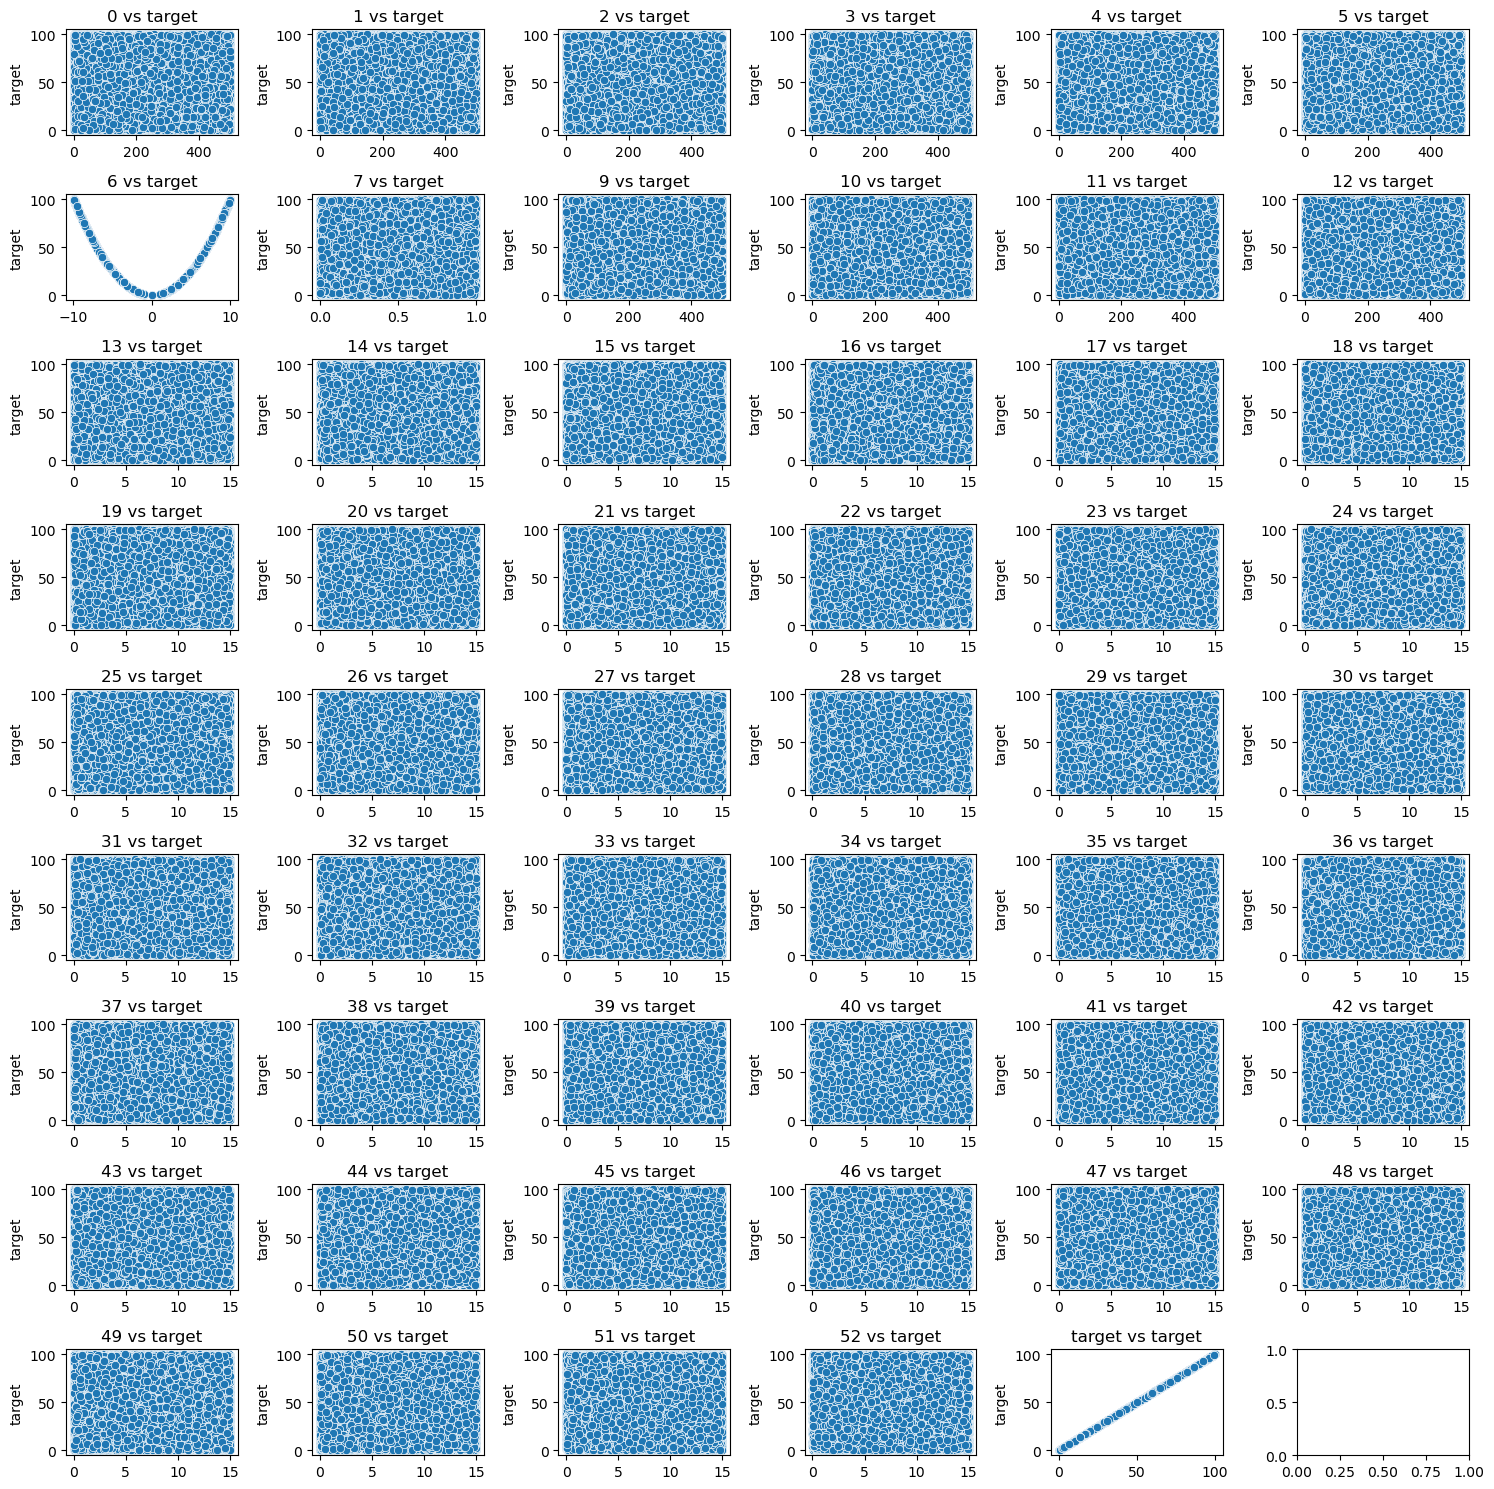

In [7]:
fig, ax = plt.subplots(9, 6, figsize=(15, 15))
ax = ax.flatten()

for i, var in enumerate(df_train.loc[:, df_train.columns != '8'].columns.tolist()):
    sns.scatterplot(data=df_train.loc[:, df_train.columns != '8'], x=var, y='target', ax=ax[i])
    ax[i].set_title(f"{var} vs target")
    ax[i].set(xlabel=None)

plt.tight_layout()
plt.show()

It is evident that there is a quadratic relationship between feature 6 and the target feature.

In [8]:
# Transforming feature 6 in order to get a linear dependence with target
for df in [df_train, df_test]:
    # Creating new feature - 6 (squared)
    df['6_squared'] = df['6'] ** 2

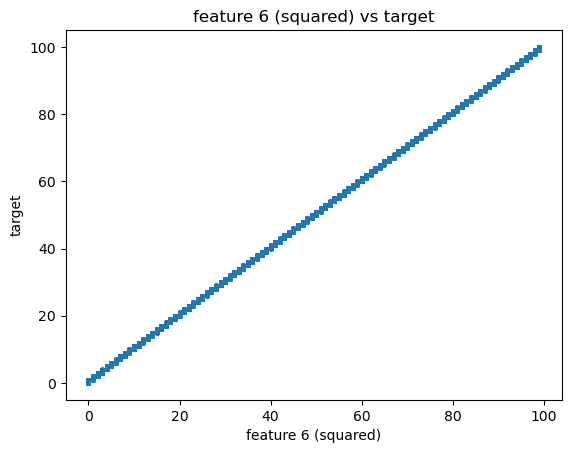

In [9]:
plt.scatter(data = df_train, x='6_squared', y='target', s=5)

plt.xlabel('feature 6 (squared)')
plt.ylabel('target')
plt.title("feature 6 (squared) vs target")

plt.show()

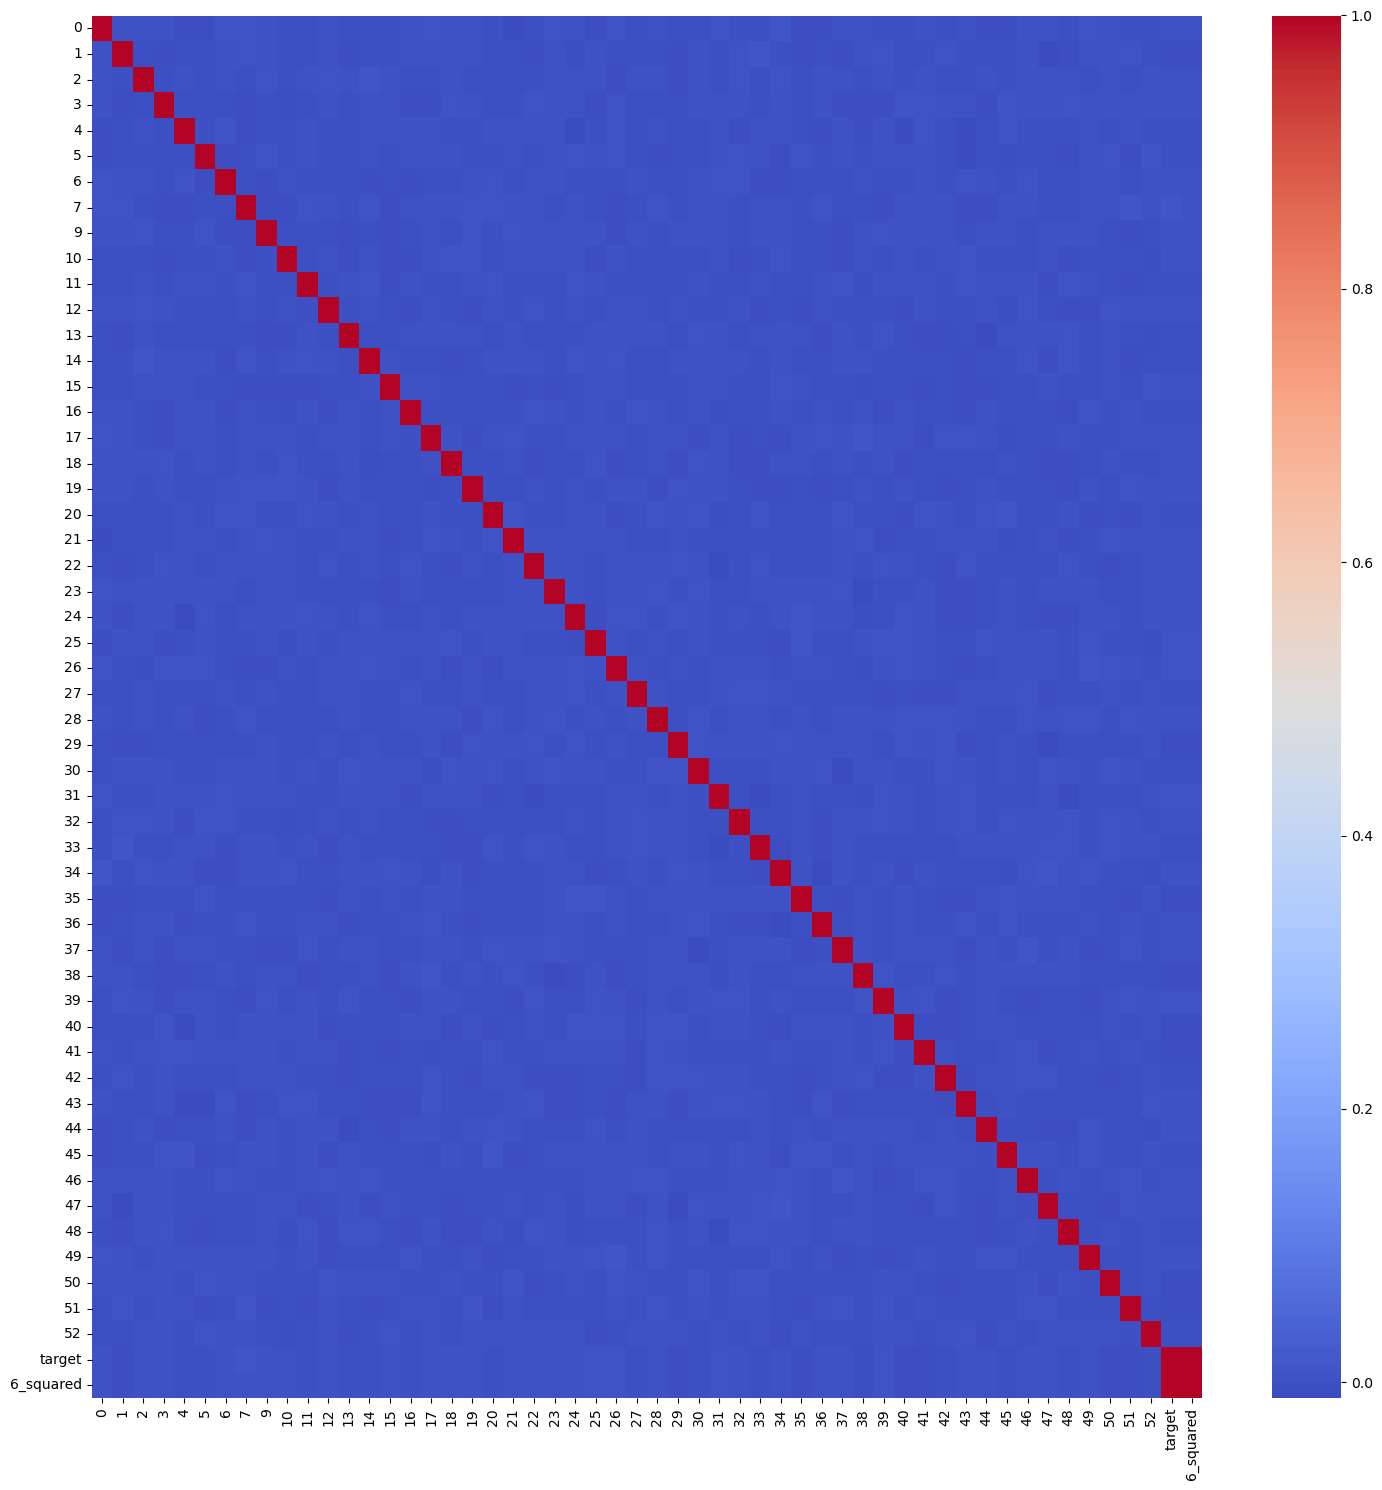

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.loc[:, df_train.columns != "8"].corr(), annot=False, cmap='coolwarm')
plt.tight_layout()
plt.show()

* There is very strong linear dependance between feature 6_squared and target
* There are no linear correlations between other numerical features

In [11]:
# Categorical versus numerical correlations

group1 = df_train.loc[df_train['8'] == 0].loc[:, df_train.columns != '8']
group2 = df_train.loc[df_train['8'] == 1].loc[:, df_train.columns != '8']

In [12]:
# T-test

ttest = sp.stats.ttest_ind(group1, group2)
ttest_res = pd.DataFrame({
    "Categorical": list('8' * 54),
    "Value 1": list('0' * 54),
    "Value 2": list('1' * 54),
    "Numerical": df_train.loc[:, df_train.columns != "8"].columns.tolist(),
    "p-value": ttest[1],
    "t-statistic": ttest[0]
})

ttest_res = ttest_res.set_index("Numerical")
ttest_res.loc[ttest_res['p-value'] <= 0.05]

,Categorical,Value 1,Value 2,p-value,t-statistic
Numerical,,,,,
0,8,0,1,0.016249,-2.403316
6,8,0,1,0.000000,-826.665693
9,8,0,1,0.027028,2.211153
16,8,0,1,0.025268,2.237313
43,8,0,1,0.042071,-2.032849
46,8,0,1,0.040246,-2.051245


In [13]:
# ANOVA

anova = sp.stats.f_oneway(group1, group2)
anova_res = pd.DataFrame({
    "Categorical": list('8' * 54),
    "Numerical": df_train.loc[:, df_train.columns != "8"].columns.tolist(),
    "p-value": anova[1],
    "f-statistic": anova[0]
})

anova_res = anova_res.set_index("Numerical")
anova_res.loc[anova_res['p-value'] <= 0.05]

,Categorical,p-value,f-statistic
Numerical,,,
0,8,0.016249,5.775928
6,8,0.000000,683376.167914
9,8,0.027028,4.889198
16,8,0.025268,5.005570
43,8,0.042071,4.132476
46,8,0.040246,4.207605


* Only feature 6 (squared) has a strong correlation with target
* Feature 6 and 8 are highly correlated. We need to do something about it so that we don't end up with multicollinearity.

In [14]:
df_train.to_csv('data/train.csv', index=False)
df_test.to_csv('data/test.csv', index=False)